In [2]:
import numpy as np
import seaborn as sns
import os, sys
from matplotlib import pyplot as plt
from sklearn import metrics

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)

CURRENT_DIR = os.path.dirname(os.path.abspath("rare_pattern_detect"))
sys.path.append(os.path.dirname(CURRENT_DIR))

%reload_ext autoreload
%autoreload 2

from rare_pattern_detect.patterns import PatternSpace, PatternSpaceType
from rare_pattern_detect.rare_pattern_detect import RarePatternDetect
from rare_pattern_detect.pattern_space_utils import draw_largest_bounding_area, draw2dpattern

# Evaluating 20 data points (10 anomalies and 10 normal points) using 100 training points

In [3]:
# # Loading the data
with np.load('../ADBench-main/datasets/Classical/34_smtp.npz') as data:
    X = data['X']
    y = data['y']
    idx = np.random.permutation(len(X))
    X,y = X[idx], y[idx]

In [4]:
X

array([[ 1.62924054,  7.0750478 ,  5.81740873],
       [-2.30258509,  6.7130777 ,  5.78720408],
       [-2.30258509,  7.30121528,  5.79636166],
       ...,
       [-2.30258509,  7.73940274,  5.81740873],
       [-2.30258509,  7.91319178,  5.79636166],
       [ 0.74193734,  6.8470494 ,  5.79331844]])

In [5]:
anomalies_indices = [i for i, j in enumerate(y) if j == 1]

normal_indices = [i for i, j in enumerate(y) if j != 1]

print("anomalies_indices: ", len(anomalies_indices))

print("normal_indices: ", len(normal_indices))

anomalies_indices:  30
normal_indices:  95126


In [6]:
TRAINING_LIMIT = 100
TESTING_INDICES = -20 
TRAINING_ANOMALIES_INDICES = 10 

testing_anomalies_indices = anomalies_indices[TESTING_INDICES:]

testing_normal_indices = normal_indices[TESTING_INDICES:]

training_normal_indices = normal_indices[:TRAINING_LIMIT]

training_anomalies_indices = anomalies_indices[:TRAINING_ANOMALIES_INDICES]

testing_indices = np.concatenate((testing_anomalies_indices, testing_normal_indices))

testing_labels = y[testing_indices]

y = testing_labels

In [7]:
# training_set = np.array(X[training_normal_indices])

training_set = np.array(np.concatenate((X[training_normal_indices],X[training_anomalies_indices])))

testing_set = np.array(np.concatenate((X[testing_anomalies_indices],X[testing_normal_indices])))

# 3D scatter plot

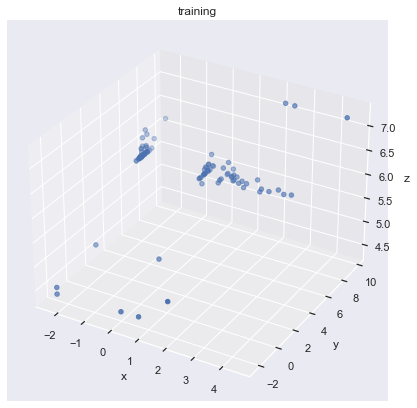

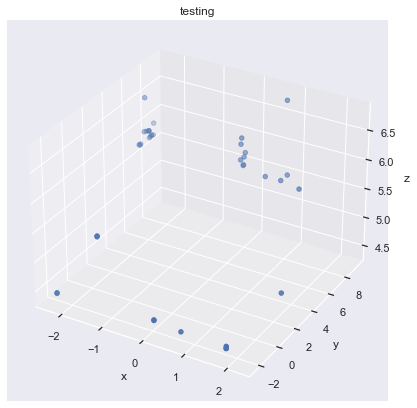

In [8]:
# training_set

from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

def scatter_plot_3d(set, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')

    x = set[:,0]
    y = set[:,1]
    z = set[:,2]

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.scatter(x, y, z)
    ax.set_title(f"{title}")
    
    plt.show()

scatter_plot_3d(training_set, "training")
scatter_plot_3d(testing_set, "testing")

In [9]:
def calculate_f_hats(training_set, testing_set, y, min_area):
    initial_tau = 0.1
    epsilon = 0.1
    delta = 0.1

    print(f"num datapoints: {len(y)}")


    rpd = RarePatternDetect(
        delta=delta,
        tau=initial_tau,
        epsilon=epsilon,
        pattern_space = PatternSpace(
            type = PatternSpaceType.AXIS_ALIGNED_HYPER_RECTANGLES, 
            cutoff = min_area
        )
    )

    rpd.fit(training_data=training_set, testing_data=testing_set)
    preds = []
    f_hats = []
    print("number of points to be classified: ", len(testing_set))
    for i, point_to_be_classified in enumerate(testing_set):
        # if i % 10 == 0: 
        print(f"----- {i} data points processed -----")
        model, prediction = rpd.predict_score(point_to_be_classified)
        preds.append(prediction)
        f_hats.append(model.minimized_f_hats) # [i])

    return f_hats

def evaluate_fhat_distribution(f_hats, min_area):
    ## Evaluating the f_hat distributions 
    indices = [i for i, j in enumerate(y) if j == 1]
    fhat_anomelies = [f_hats[i] for i, j in enumerate(indices)]
    fhat_normal = [j for i, j in enumerate(f_hats) if i not in indices]

    # TODO: same number of bins or width of the bins
    sns.histplot(fhat_normal, label=y, color="green")
    sns.histplot(fhat_anomelies, label=y, color="blue")
    plt.legend(labels=["normal","anormalies"])
    plt.title(f"f_hat distribution for min_area:{min_area}")
    plt.show()


iteration:  0
num datapoints: 40
cutoff (patterns.py):  41
testing_data not empty
number of points to be classified:  40
----- 0 data points processed -----
    functionality.  (deprecated in 6.4.2) (called from
    /Users/p392827/Desktop/PDG/porsche-research/pac-learning/pac-
    venv/lib/python3.9/site-
    packages/pyomo/contrib/mindtpy/initialization.py:154)
Restricted license - for non-production use only - expires 2023-10-25
----- 1 data points processed -----
----- 2 data points processed -----
----- 3 data points processed -----
----- 4 data points processed -----
----- 5 data points processed -----
----- 6 data points processed -----
----- 7 data points processed -----
----- 8 data points processed -----
----- 9 data points processed -----
----- 10 data points processed -----
----- 11 data points processed -----
----- 12 data points processed -----
----- 13 data points processed -----
----- 14 data points processed -----
----- 15 data points processed -----
----- 16 data point

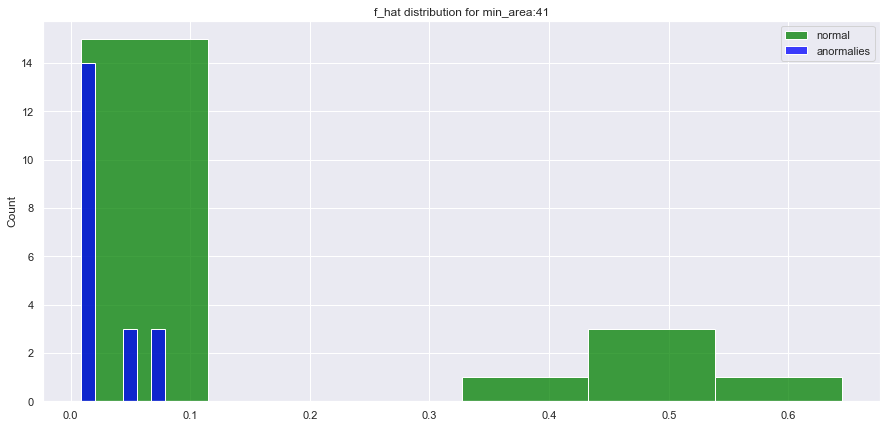

––– ––– ––– new round: i=0, mu :0.060000000000000005  ––– ––– –––
 correct results: 25,  percentage: 0.625
––– ––– ––– new round: i=1, mu :0.07  ––– ––– –––
 correct results: 23,  percentage: 0.575
––– ––– ––– new round: i=2, mu :0.08  ––– ––– –––
 correct results: 26,  percentage: 0.65
––– ––– ––– new round: i=3, mu :0.09  ––– ––– –––
 correct results: 26,  percentage: 0.65
––– ––– ––– new round: i=4, mu :0.1  ––– ––– –––
 correct results: 25,  percentage: 0.625
––– ––– ––– new round: i=5, mu :0.15000000000000002  ––– ––– –––
 correct results: 25,  percentage: 0.625
––– ––– ––– new round: i=6, mu :0.25  ––– ––– –––
 correct results: 25,  percentage: 0.625
––– ––– ––– new round: i=7, mu :0.55  ––– ––– –––
 correct results: 21,  percentage: 0.525
––– ––– ––– new round: i=8, mu :0.75  ––– ––– –––
 correct results: 20,  percentage: 0.5
––– ––– ––– new round: i=9, mu :1.05  ––– ––– –––
 correct results: 20,  percentage: 0.5
auroc:  0.625
auroc:  0.5750000000000001
auroc:  0.65
auroc:  0.65

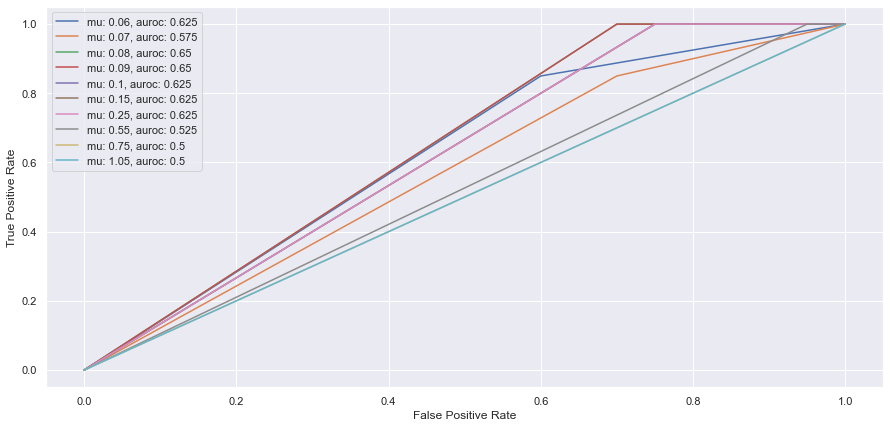

In [10]:
# creating a range of taus
taus = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.5, 0.7, 1.0]  # , 2.0, 2.5, 3.0, 4.0]
min_areas = [41] # [31, 35, 41] # [4.6, 10, 20, 30, 46]
epsilon = 0.1
pac_rpad_results = []

for i, min_area in enumerate(min_areas):
    print("iteration: ", i)

    f_hats = calculate_f_hats(training_set, testing_set, y, min_area)
    
    evaluate_fhat_distribution(f_hats, min_area)

    predictions_list = []

    for i, tau in enumerate(taus):
        print(f"––– ––– ––– new round: i={i}, mu :{(tau + (epsilon/2))}  ––– ––– –––")
        
        predictions = np.asarray(f_hats) < (tau + (epsilon/2))
        predictions_list.append([tau + (epsilon/2), min_area, predictions])

        preds = np.where(predictions==1, predictions, False).astype(bool)
        count_similar_predictions = np.count_nonzero(y == preds)
        per_similar_predictions = count_similar_predictions/len(y)
        print(f" correct results: {count_similar_predictions},  percentage: {per_similar_predictions}")

    pac_rpad_results.append(predictions_list)

    for i, (mu,_,p) in enumerate(predictions_list):

        auc = metrics.roc_auc_score(y, p)

        # Recall that a model with an AUC score of 0.5 is no better than a model that performs random guessing.
        print("auroc: ",auc)

        fpr, tpr, _ = metrics.roc_curve(y, p)
        
        #create ROC curve
        plt.plot(fpr,tpr, label=f"mu: {np.round(mu, 3)}, auroc: {np.round(auc,3)}")
        plt.legend(loc="upper left")

    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [11]:
pac_rpad_predictions = np.asarray(predictions_list, dtype=object)[:,2]

# True -> anomalie || False -> normal point
pac_rpad_converted_predictions = [x.astype('uint8') for _, x in enumerate(pac_rpad_predictions)]
pac_rpad_converted_predictions

[array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=uint8),
 array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=uint8),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=uint8),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=uint8),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=uint8),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=uint8),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 

In [12]:
f_hats_backup = f_hats

In [13]:
f_hats = f_hats / np.max(f_hats)

In [14]:
m = metrics.roc_curve(y, f_hats)

In [15]:
m

(array([0.  , 0.05, 0.3 , 0.3 , 0.4 , 0.4 , 0.45, 0.45, 0.45, 0.5 , 0.5 ,
        0.5 , 0.6 , 0.6 , 0.75, 0.75, 0.95, 0.95, 1.  ]),
 array([0.  , 0.  , 0.  , 0.15, 0.15, 0.3 , 0.3 , 0.4 , 0.45, 0.45, 0.6 ,
        0.65, 0.65, 0.7 , 0.7 , 0.8 , 0.8 , 1.  , 1.  ]),
 array([2.        , 1.        , 0.14262298, 0.12246593, 0.10536954,
        0.07036202, 0.03775918, 0.03161125, 0.03161125, 0.02001252,
        0.01914172, 0.01914172, 0.01854566, 0.01854566, 0.01854566,
        0.01854566, 0.01714029, 0.0137555 , 0.0137555 ]))

In [16]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

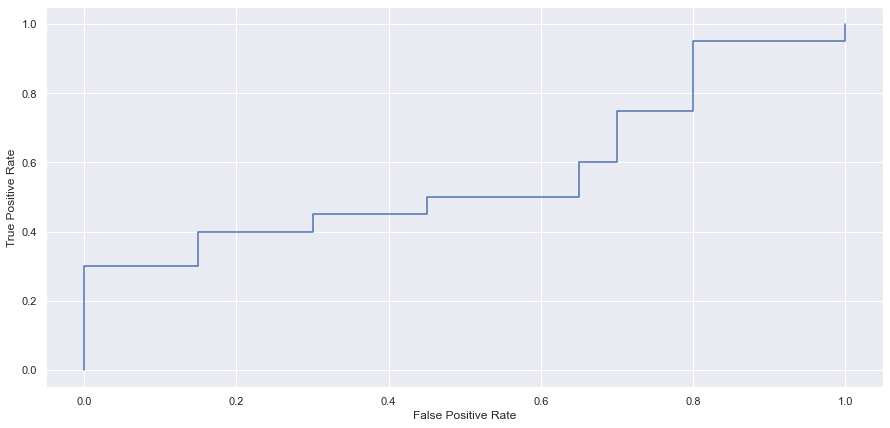

In [17]:
from sklearn.metrics  import roc_curve
from sklearn.metrics import RocCurveDisplay

#y_score = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y, f_hats, pos_label=0)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [18]:
metrics.roc_auc_score((y+1)%2, f_hats)

0.5675

# Comparison with IF

In [19]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=0).fit(training_set)

# -1 anomalie
r = clf.predict(testing_set) 

scores = clf.score_samples(testing_set)

print("IF results: ", r)

r = - np.where(r==-1, r, 0)
 
print("converted IF results: ",r)

# 1 -> anomalies. 0 -> normal
print("true labels: ", y)

count_similar_predictions = np.count_nonzero(r == y)
per_similar_predictions = count_similar_predictions/len(testing_set)

print("count_similar_predictions: ", count_similar_predictions)
print("per_similar_predictions: ", per_similar_predictions)

auc = metrics.roc_auc_score((y+1)%2, scores)

print("auc: ", auc)

# fpr, tpr, _ = metrics.roc_curve(y, r)
# print("fpr, tpr: ", fpr, tpr)

# plt.plot(fpr,tpr);

IF results:  [ 1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1]
converted IF results:  [0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0]
true labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
count_similar_predictions:  34
per_similar_predictions:  0.85
auc:  0.9075


In [20]:
[np.count_nonzero(pac_rpad_pred == y) for _, pac_rpad_pred in enumerate(pac_rpad_converted_predictions)]

[25, 23, 26, 26, 25, 25, 25, 21, 20, 20]

In [21]:
# # TODO: plot the AUCROC curve for different threshhold values 

# - normalize the f_hats by dividing by max 
# - feed the ormalized f_hats to the skearn roc_auc_score (y_true is the true labels and the other one is the normalized f_hats) -> single np.number
# - draw the curve vor different mu's 
# - feed the score of the IF to roc_auc_score 